<a href="https://colab.research.google.com/github/zzhenxi/CP2/blob/main/jh_%EC%8B%9C%EA%B0%81%ED%99%94(%EC%9E%91%EC%97%85%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업 목록 

1.  **셀럽이 어떻게 활동해야 팬들이 좋아하는지 분석**
    - 상위 n퍼센트에 속하는 셀럽에 대한 분석과 시각화 자료
        
        `그래프로 (직관적으로) 보여주는 것에 중점`
        
        - 셀럽이 먼저 대화를 시작한 경우 비율 (날짜별로)
        - 셀럽의 태도에 따른 시간의 흐름에 따른 긍정도 변화의 시각화
        - 시간의 흐름에 따른 셀럽의 말에 대한 팬의 응답률
            
            → 이렇게 했더니 팬의 응답률이 올라갔다고 제시하기 위함
            
        - 시간의 흐름에 따른 긍정도 변화 선그래프
            
             → 이렇게 했더니 팬의 긍정도가 올라갔다고 제시하기 위함

- 아쉬운 부분 : 🥺 표시

## 한국어 폰트 설치 등

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


## 데이터 가져오기
- data : 모든 데이터 목록

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [3]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/AIB_PJ2/dataset/[jh]cleaned_data_new.csv", keep_default_na=False)

In [5]:
data

,Unnamed: 0,date,time,celeb,code,comments,file
0,1,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,3,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,4,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,5,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...,...
10292,10634,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,10635,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,10636,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,10637,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [6]:
data_info = pd.read_excel("/content/drive/MyDrive/AIB_PJ2/dataset/계정 정보 및 설문조사.xlsx", sheet_name="계정 정보", keep_default_na=False)

In [7]:
data_surv = pd.read_excel("/content/drive/MyDrive/AIB_PJ2/dataset/계정 정보 및 설문조사.xlsx", sheet_name="설문조사", keep_default_na=False)

## 데이터 전처리 

### data_info   
- data_info -> celeb_li, user_li

In [8]:
data_info

,셀럽 계정,테스트 계정
0,VAYA,BYZG
1,WKDG,XPBD
2,XMSQ,YQVX
3,CJSL,YSUL
4,DQZB,RLGI
5,JLDN,QOGI
6,OSQR,IYWE
7,JSEU,MDYT
8,LOVM,SLYG
9,JOPU,SNLX


In [9]:
# 각각 계정 리스트 안에 넣기 
celeb_li = list(np.array(data_info['셀럽 계정'].to_list()))
celeb_li = [id for id in celeb_li if id != ''] # 공백 없애기, user_li의 경우 공백은 없을 확률이 높으므로 따로 코드 추가 x

user_li = list(np.array(data_info['테스트 계정'].to_list()))


### data_surv
- 추천점수 부분이 없는, 공백(null)값을 포함한 행 제거
- 셀럽별 / 유저별 survey 분리
- data_surv_score : 추천 점수가 있는 항목
- data_surv_pay : 얼마 낼 의향인지 가격이 있는 항목

In [10]:
data_surv.columns

Index(['코드', '추천 점수', '점수 이유', '지불 의사 금액', '플랫폼 수수료', '추가 요청 기능', '기타 의견'], dtype='object')

In [11]:
data_surv_score = data_surv[data_surv['추천 점수'] != '']

In [12]:
data_surv_score.head()

,코드,추천 점수,점수 이유,지불 의사 금액,플랫폼 수수료,추가 요청 기능,기타 의견
0,KAMF,10,만족해서,"월 10,000원 이상 ~30,000원 미만",5% 이상 ~ 10% 미만,톡 알림 끄고 키기,넹
1,MLSC,8,셀럽과 대화가 가능한데 단톡방과는 다른 개별 대화같은느낌. 서로 부담없이 가능한 대화.,"월 30,000원 이상 ~50,000원 미만",5% 이상 ~ 10% 미만,인스타그램 피드처럼 셀럽에게만 보이는 포스트기능이 있으면 좋겠네요.,"앱이 많이 느려서 실행하면 기다림이 잦고, 셀럽이 메시지를 보내도 알림이 안 떠요...."
2,ZSOS,7,1대1처럼 대화를 하는 점이 좋으나 아직 오류가 많기 때문에,"월 3,000원 미만",5% 미만,캡쳐 기능이 있었으면 좋겠습니다,대화내용이 사라지거나 알람이 늦게 오는 오류들만 없어지면 좋겠습니다
3,GUKR,9,메시지가 셀럽에게만 보여져서 좋고 톡방에 여러명이 있어도 귓속말 답변도 받을 수 있...,"월 3,000원 미만",5% 미만,카톡처럼 이모티콘 사용이 가능했으면 좋겠어요,셀랍 방에 대화 내용을 살펴보려고 내리면 대화내용이 안 보이는 경우가 있어요
4,VAYA,7,현재는 불안정한 요소들이 많아서 더 개선되면 좋다고 생각합니다,"월 3,000원 미만",5% 이상 ~ 10% 미만,일단은 안정성만 더 좋아도 될 것 같아오,팬들과 소통을 중요하게 생각하는 셀럽들에겐 되게 좋은 어플


In [13]:
data_surv_pay = data_surv[data_surv['지불 의사 금액'] != '']

In [14]:
data_surv_pay.head()

,코드,추천 점수,점수 이유,지불 의사 금액,플랫폼 수수료,추가 요청 기능,기타 의견
0,KAMF,10,만족해서,"월 10,000원 이상 ~30,000원 미만",5% 이상 ~ 10% 미만,톡 알림 끄고 키기,넹
1,MLSC,8,셀럽과 대화가 가능한데 단톡방과는 다른 개별 대화같은느낌. 서로 부담없이 가능한 대화.,"월 30,000원 이상 ~50,000원 미만",5% 이상 ~ 10% 미만,인스타그램 피드처럼 셀럽에게만 보이는 포스트기능이 있으면 좋겠네요.,"앱이 많이 느려서 실행하면 기다림이 잦고, 셀럽이 메시지를 보내도 알림이 안 떠요...."
2,ZSOS,7,1대1처럼 대화를 하는 점이 좋으나 아직 오류가 많기 때문에,"월 3,000원 미만",5% 미만,캡쳐 기능이 있었으면 좋겠습니다,대화내용이 사라지거나 알람이 늦게 오는 오류들만 없어지면 좋겠습니다
3,GUKR,9,메시지가 셀럽에게만 보여져서 좋고 톡방에 여러명이 있어도 귓속말 답변도 받을 수 있...,"월 3,000원 미만",5% 미만,카톡처럼 이모티콘 사용이 가능했으면 좋겠어요,셀랍 방에 대화 내용을 살펴보려고 내리면 대화내용이 안 보이는 경우가 있어요
4,VAYA,7,현재는 불안정한 요소들이 많아서 더 개선되면 좋다고 생각합니다,"월 3,000원 미만",5% 이상 ~ 10% 미만,일단은 안정성만 더 좋아도 될 것 같아오,팬들과 소통을 중요하게 생각하는 셀럽들에겐 되게 좋은 어플


## 상위 n 퍼센트의 셀럽 목록, 팬의 숫자 
- 상위 n개의 셀럽 정하는 기준 
- 대화방에서 팬의 수 방의 참여자 만족도가 높은 순(셀럽, 팬 합쳐서) / 방의 활성화 순서 (인당 대화가 많은 순서) (전체 대화 / 참여자수) / 방의 부정도가 가장 낮은

### (1) 참여도가 높은 방 순서
- top10_li

In [ ]:
### 우선 임시로 상위 10개
### 나중에 데이터 추가되면,, 상위 n퍼센트로 바꾸거나 해도 좋을듯 

In [ ]:
data

,Unnamed: 0,date,time,celeb,code,comments,file
0,1,"Jul 12, 2021",20:39,VAYA,KAMF,님이 참여했습니다.,NaN
1,2,"Jul 12, 2021",20:40,VAYA,KAMF,사랑해요🖤,NaN
2,3,"Jul 12, 2021",20:40,VAYA,MLSC,님이 참여했습니다.,NaN
3,4,"Jul 12, 2021",20:41,VAYA,ZSOS,님이 참여했습니다.,NaN
4,5,"Jul 12, 2021",20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,NaN
...,...,...,...,...,...,...,...
10292,10634,"Aug 18, 2021",08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,NaN
10293,10635,"Aug 18, 2021",17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,NaN
10294,10636,"Aug 18, 2021",18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,NaN
10295,10637,"Aug 18, 2021",18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,NaN


In [ ]:
# 대화방 참여자가 총 몇명인지 어떻게 알아낼까? -> celeb별 대화 참여자 unique값 찾기, 총 참여자 수
data.groupby('celeb')

In [ ]:
# celeb unique 값 찾기 # 따로 받은 celeb_li와 순서와 내용이 같음.
# a = list(data['celeb'].unique())
# 따라서 굳이 따로 구할 필요 없음 -> 이건 나중에 필요할때 다시 활용

In [ ]:
# 셀럽별 대화방 참여자 총 몇명 (unique)
user_dic = {} # [celeb : 유저들 unique 값 리스트]
for id in celeb_li:
  val = list(data[data['celeb'] == id]['code'].unique())
  user_dic[id] = val

In [ ]:
# 셀럽별 대화 총 몇개 
com_dic = {} # [celeb : 유저들 comments 개수]
for id in celeb_li:
  val = len(data[data['celeb'] == id]['comments'])
  com_dic[id] = val

In [ ]:
# 셀럽별 대화방 활성화 정도
act_dic = {} # 얼마나 acitve 한지 
for id in celeb_li:
  user_num = len(user_dic[id]) # user_num : 유저 몇명?
  com_num = com_dic[id] # com_num : comments 몇개?
  act_dic[id] = round(com_num/user_num, 3) # 유저 / 총 대화 수로 acitve한 정도를 구해줍니다.

In [ ]:
# act_dic을 바탕으로 상위 n 퍼센트를 구합니다. 
act_dic

{'CJSL': 31.13,
 'DQZB': 10.065,
 'JLDN': 26.086,
 'JOPU': 16.875,
 'JSEU': 4.9,
 'LOVM': 17.6,
 'OSQR': 5.867,
 'VAYA': 126.708,
 'WKDG': 51.818,
 'XMSQ': 73.548}

In [ ]:
# dictionary active가 높은 순서대로 만들기 
sorted_dict = {}
for k, v in sorted(act_dic.items(), key = lambda item: item[1], reverse = True):
  sorted_dict[k] = v

# 코드 참고 https://codechacha.com/ko/python-sorting-dict/

In [ ]:
# top 10 celeb list
top10_li1 = list(sorted_dict.keys())[:10]

In [ ]:
top10_li1

['VAYA',
 'XMSQ',
 'WKDG',
 'CJSL',
 'JLDN',
 'LOVM',
 'JOPU',
 'DQZB',
 'OSQR',
 'JSEU']

### (만약 데이터 전처리가 잘 되었다면 이 부분은 건너뛰어도 됩니다.)

In [ ]:
data

,Unnamed: 0,date,time,celeb,code,comments,file
0,1,"Jul 12, 2021",20:39,VAYA,KAMF,님이 참여했습니다.,NaN
1,2,"Jul 12, 2021",20:40,VAYA,KAMF,사랑해요🖤,NaN
2,3,"Jul 12, 2021",20:40,VAYA,MLSC,님이 참여했습니다.,NaN
3,4,"Jul 12, 2021",20:41,VAYA,ZSOS,님이 참여했습니다.,NaN
4,5,"Jul 12, 2021",20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,NaN
...,...,...,...,...,...,...,...
10292,10634,"Aug 18, 2021",08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,NaN
10293,10635,"Aug 18, 2021",17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,NaN
10294,10636,"Aug 18, 2021",18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,NaN
10295,10637,"Aug 18, 2021",18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,NaN


✍ 이 밑부분은 나중에 레이블 된 데이터 가져오면 다시..

In [ ]:
# data['label'] = data['label'].dropna()

In [ ]:
# data['label'].value_counts()

In [ ]:
# data['label'] = data['label'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer 가 발생

fillna로 해결

In [ ]:
# data['label'] = data['label'].fillna(9) # 우선 9로 na값을 대체 
# index1 = data[data['label']==9].index # label 값이 9인 행 index를 추출
# data = data.drop(index1) # 해당하는 index를 drop

In [ ]:
# # 마지막으로 label 행을 int로 바꿔준다.
# data['label'] = data['label'].astype(int)

### (2) 부정도가 낮은 방 순서
- top10_li

In [ ]:
a = data.groupby(['celeb', 'label']).count()

KeyError: ignored

In [ ]:
# data_012는 셀럽에 따라 0이 몇개, 1이 몇개, 2가 몇개인지 정리해놓은 dataframe
data_012 = a[['date']]

NameError: ignored

In [ ]:
data_012

NameError: ignored

In [ ]:
list(data_012.loc['CJSL'].index)

In [ ]:
# pivot_table로 보기 편하게 바꿔주기 / 0이 없는 곳은 0.001으로 자리 자동으로 메꿔줌 (fill_value) 
# 0.0001로 메꿔주는 이유 : 부정도가 0이면, 총합에 나누기를 할 수가 없으므로 최대한 작은 수로 나눠줘서 점수를 올려줌
data_012 = pd.pivot_table(data_012,
                       index='celeb',
                       columns='label',
                       fill_value = 0.001)

In [ ]:
# 멀티 인덱스 해제 - 컬럼명 수정
data_012.columns = [0, 1, 2]

In [ ]:
data_012

In [ ]:
# 총합 컬럼
data_012['sum'] = data_012[[0, 1, 2]].sum(axis=1)
data_012

In [ ]:
# 부정도 컬럼 추가 
data_012['div'] = data_012['sum']/data_012[0]

In [ ]:
data_012

In [ ]:
data_012 = data_012.sort_values(by=["div"], ascending=[False]) 

In [ ]:
top10_li2 = list(data_012.index)[:10]

In [ ]:
top10_li2

### (3) 1와 2번 조합
- 1번 : 순위가 높은 순서대로 10점씩 부과 
- 2번 : 순위가 높은 순서대로 8점씩 부과
- merged_top10

In [ ]:
# 활성화 정도 
top10_li1

In [ ]:
# top10_li1 = top10_li

In [ ]:
# 긍정도 
top10_li2

In [ ]:
top10_li_1 = pd.DataFrame({'ID':top10_li1,
                             'score':[100, 90, 80, 70, 60, 50, 40, 30, 20, 10]})
top10_li_2 = pd.DataFrame({'ID':top10_li2,
                             'score':[80, 72, 64, 56, 48, 40, 32, 24, 16, 8]})

In [ ]:
top10_li_1

In [ ]:
top10_li_2

In [ ]:
merged_top10 = pd.merge(left = top10_li_1 , right = top10_li_2, how = "outer", on='ID')

In [ ]:
merged_top10
# 예시에서는 NaN값이 나오지 않지만 만약 나오는 경우에는 결측치를 0으로 대체해주기!

In [ ]:
# 점수 총합 
merged_top10['sum'] = merged_top10['score_x']+merged_top10['score_y']

In [ ]:
merged_top10

In [ ]:
# (순위 구하기 마지막!!) sum값을 기준으로 top 순서 구하기!!!
merged_top10 = merged_top10.sort_values(by=["sum"], ascending=[False]) 
merged_top10

In [ ]:
# top10의 ID를 list안에 넣기
top10_list = list(merged_top10['ID'])

In [ ]:
# top10에 해당하는 셀럽들의 행만 불러오기
data_isin = data
data_isin = data_isin[data_isin['celeb'].isin(top10_list)]

In [ ]:
data_isin

## 셀럽의 태도에 따른 시간의 흐름에 따른 긍정도 변화의 시각화
- 셀럽의 태도 기준
    - 셀럽이 먼저 대화를 시작한 비율
    - 평균 하루 대화량 
    - 요일별, 시간별 대화 분포 (애매함)

In [15]:
data_isin = data.drop('Unnamed: 0', axis=1)

In [16]:
data_isin

,date,time,celeb,code,comments,file
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [17]:
data_isin.dropna(subset = ['comments'])

,date,time,celeb,code,comments,file
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


### (1) 셀럽이 먼저 대화를 시작한 비율
- 셀럽별    
대화를 먼저 시작한 날짜 / 전체 대화 날짜 * 100
- 전체 시각화 그래프   
10명의 셀럽 비교 


In [18]:
### 전처리 ###
# "님이 참여했습니다." 가 포함된 text 지우기 
# null 값 지우기 

data_start = data_isin.dropna(subset = ['comments']) # comments컬럼을 기준으로 결측값 있는 행 drop
data_start = data_start.drop('file', axis=1) # file 컬럼 삭제
drop_index = data_start[data_start['comments'].str.contains('님이 참여했습니다.')].index
data_start = data_start.drop(index=drop_index)

In [19]:
'''
[note]
- x의 형태는 dataframe (묶인 그룹별로의 df가 들어가게 됨.)
- groupby 후, 함수를 적용해주는 방법 이용 
- 날짜별로 셀럽이 먼저 대화를 시도 했을 경우, yes 아니면 no가 들어간다. (🥺 하지만, 12시가 넘은 밤에 대화를 했을 경우도 생각해야 함.)
'''

def func(x):
  d = {}
  if 'Operator' in  x.iloc[0]['comments'] :
    d['yes/no'] = 'yes'
  else :
    d['yes/no'] = 'no'

  return pd.Series(d, index=['yes/no'])
  

In [20]:
data_start_yesno = data_start.groupby(['celeb', 'date']).apply(func)
data_start_yesno

In [ ]:
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [21]:
data_start_yesno
# 날짜대로 정렬해야함. 

yes/no
celeb date             
CJSL  2021-06-12    yes
      2021-06-13     no
      2021-06-14     no
      2021-06-15    yes
      2021-06-16     no
...                 ...
XMSQ  2021-08-15     no
      2021-08-16     no
      2021-08-17     no
      2021-08-18     no
      2021-08-19     no

[294 rows x 1 columns]

In [43]:
data_start_yesno = data_start_yesno.groupby(['celeb', 'yes/no']).size().unstack(fill_value=0)

In [45]:
data_start_yesno['yes_persent'] = (data_start_yesno['yes']/(data_start_yesno['no'] + data_start_yesno['yes'])) * 100

In [46]:
data_start_yesno

yes/no,no,yes,yes_persent
celeb,,,
CJSL,32,36,52.941176
DQZB,16,13,44.827586
JLDN,24,15,38.461538
JOPU,7,1,12.500000
JSEU,5,2,28.571429
LOVM,6,1,14.285714
OSQR,8,7,46.666667
VAYA,32,7,17.948718
WKDG,37,5,11.904762


In [49]:
data_start_yesno['celeb'] = data_start_yesno.index

🥺 하위권 셀럽들의 비율을 같이 구하여 비교하면..? (데이터 받은 후에 생각해보자)

🥺 나중에 다듬을때, 꼭 순위별로 줄을 세우는 것이 좋을 것 같다.

In [50]:
data_start_yesno

yes/no,no,yes,yes_persent,celeb
celeb,,,,
CJSL,32,36,52.941176,CJSL
DQZB,16,13,44.827586,DQZB
JLDN,24,15,38.461538,JLDN
JOPU,7,1,12.500000,JOPU
JSEU,5,2,28.571429,JSEU
LOVM,6,1,14.285714,LOVM
OSQR,8,7,46.666667,OSQR
VAYA,32,7,17.948718,VAYA
WKDG,37,5,11.904762,WKDG


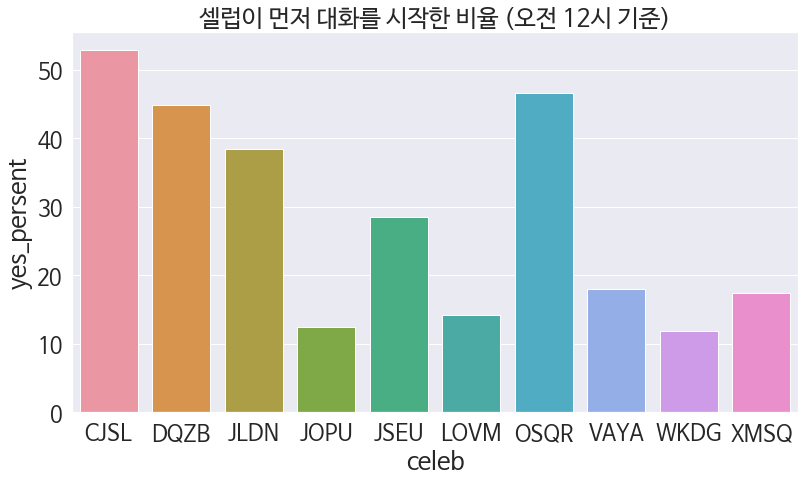

In [55]:
# 셀럽 별 yes와 no비율 구하기 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 2)
sns.set_palette('rainbow')
g_start = sns.barplot(data=data_start_yesno, x="celeb", y="yes_persent")
g_start.set_title("셀럽이 먼저 대화를 시작한 비율 (오전 12시 기준)")
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 대화 시간 구해야 함!!
# 대화 시간은 x축이 시간, y축이 하루에서 차지하는 대화 비율

### (2) 대화 시간대 
- 그래프 x축 : 시간 (00시~24시)
- 그래프 y축 : 대화 비율 (퍼센트)

In [57]:
data_contime = data.drop('Unnamed: 0', axis=1) # 전처리가 잘된 데이터의 경우 drop뒤로는 날려주세요.

In [66]:
data_contime

,time,celeb,code
0,20:39,VAYA,KAMF
1,20:40,VAYA,KAMF
2,20:40,VAYA,MLSC
3,20:41,VAYA,ZSOS
4,20:41,VAYA,MLSC
...,...,...,...
10292,08:56,JOPU,BYZG
10293,17:38,JOPU,JOPU
10294,18:03,JOPU,CCAA
10295,18:15,JOPU,ZWYM


In [65]:
data_contime = data_contime[['time', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.

In [72]:
a = data_contime.groupby(['celeb', 'time']).count()

In [ ]:
a[:50]

In [84]:
a = a.reset_index()

,celeb,time,code
0,CJSL,00:00,1
1,CJSL,00:01,4
2,CJSL,00:02,1
3,CJSL,00:05,3
4,CJSL,00:06,3
...,...,...,...
3885,XMSQ,23:54,1
3886,XMSQ,23:56,1
3887,XMSQ,23:57,1
3888,XMSQ,23:58,2


In [109]:
for i in range(len(a)):
  for j in range(24):
    if int(a['time'][i][0:2]) == j:
      a['time'][i] = j
      break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [116]:
time_sum_df = a.groupby(['time']).sum()

In [119]:
sum_val = time_sum_df['code'].sum()

In [120]:
mean_val = time_sum_df['code'].mean()

In [121]:
time_sum_df['deviation'] = time_sum_df['code'] - mean_val

In [123]:
time_sum_df = time_sum_df.reset_index()

In [124]:
time_sum_df

,time,code,deviation
0,0,372,-57.041667
1,1,205,-224.041667
2,2,193,-236.041667
3,3,92,-337.041667
4,4,57,-372.041667
5,5,29,-400.041667
6,6,89,-340.041667
7,7,136,-293.041667
8,8,336,-93.041667
9,9,370,-59.041667


In [ ]:
plt.figure(figsize=(13, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 2)
sns.set_palette('rainbow')
g_start = sns.barplot(data=data_start_yesno, x="celeb", y="yes_persent")
g_start.set_title("셀럽이 먼저 대화를 시작한 비율 (오전 12시 기준)")
plt.rc('font', family='NanumBarunGothic') 

In [129]:
time_sum_df['time'].values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


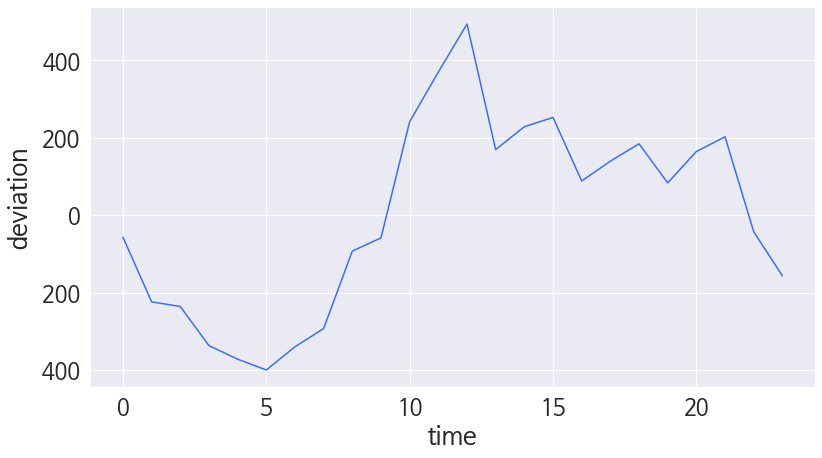

In [136]:
plt.figure(figsize=(13, 7))
time_lineplot = sns.lineplot(data=time_sum_df, x='time', y='deviation', markers='*')
g_start.set_title("셀럽이 먼저 대화를 시작한 비율 (오전 12시 기준)")

https://zephyrus1111.tistory.com/21

- 보통 대화가 낮시간에 분포 한다는 것을 알수 있다. 
- 보통 방송이나, 여가는 밤에 즐기는데, 역시 간단하게 할 수 있는 메신저라는 장점을 살려서, 낮에 문자를 보내는 것이 좋은 것 같다.

### () 시간의 흐름에 따른 셀럽의 말에 대한 팬의 응답률

### (4) 시간의 흐름에 따른 긍정도 변화 선그래프

## 상위 n퍼센트 외 나머지

### 얼마를 낼 의향있소!의 비율과 만족도 (평균 점수, 점수 비율)